In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Cardiotocographic.csv')

# Display the first few rows of the dataset
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [13]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display columns with missing values

# Handle missing values (e.g., imputation or deletion)
df.fillna(df.mean(), inplace=True)  # Impute with mean for numerical columns


In [15]:
# Check the available columns in the DataFrame
print(df.columns)

# Convert specified columns to numeric
numeric_columns = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']  # Adjust as necessary

for col in numeric_columns:
    if col in df.columns:  # Check if the column exists
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")


Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


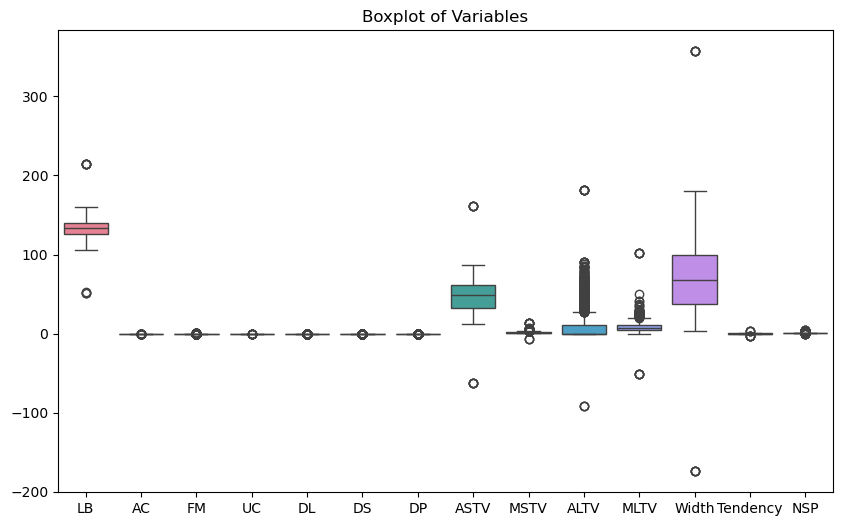

In [17]:
# Visualize to identify outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Variables')
plt.show()

# Treat outliers (e.g., capping)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [23]:
# Statistical summary
summary = df.describe()
summary

# Highlight interesting findings
# E.g., check mean values, standard deviations, etc.
mean_values = df.mean()
std_values = df.std()


In [25]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.293725,0.003147,0.001568,0.004362,0.001770,0.0,0.0,46.981873,1.304644,6.691678,8.016212,70.321076,0.319662,1.0
std,9.930227,0.003826,0.002485,0.003001,0.002668,0.0,0.0,17.612745,0.781091,10.378400,5.046784,39.570633,0.621602,0.0
min,105.000000,-0.008409,-0.003850,-0.005177,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014015,0.006416,0.013564,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


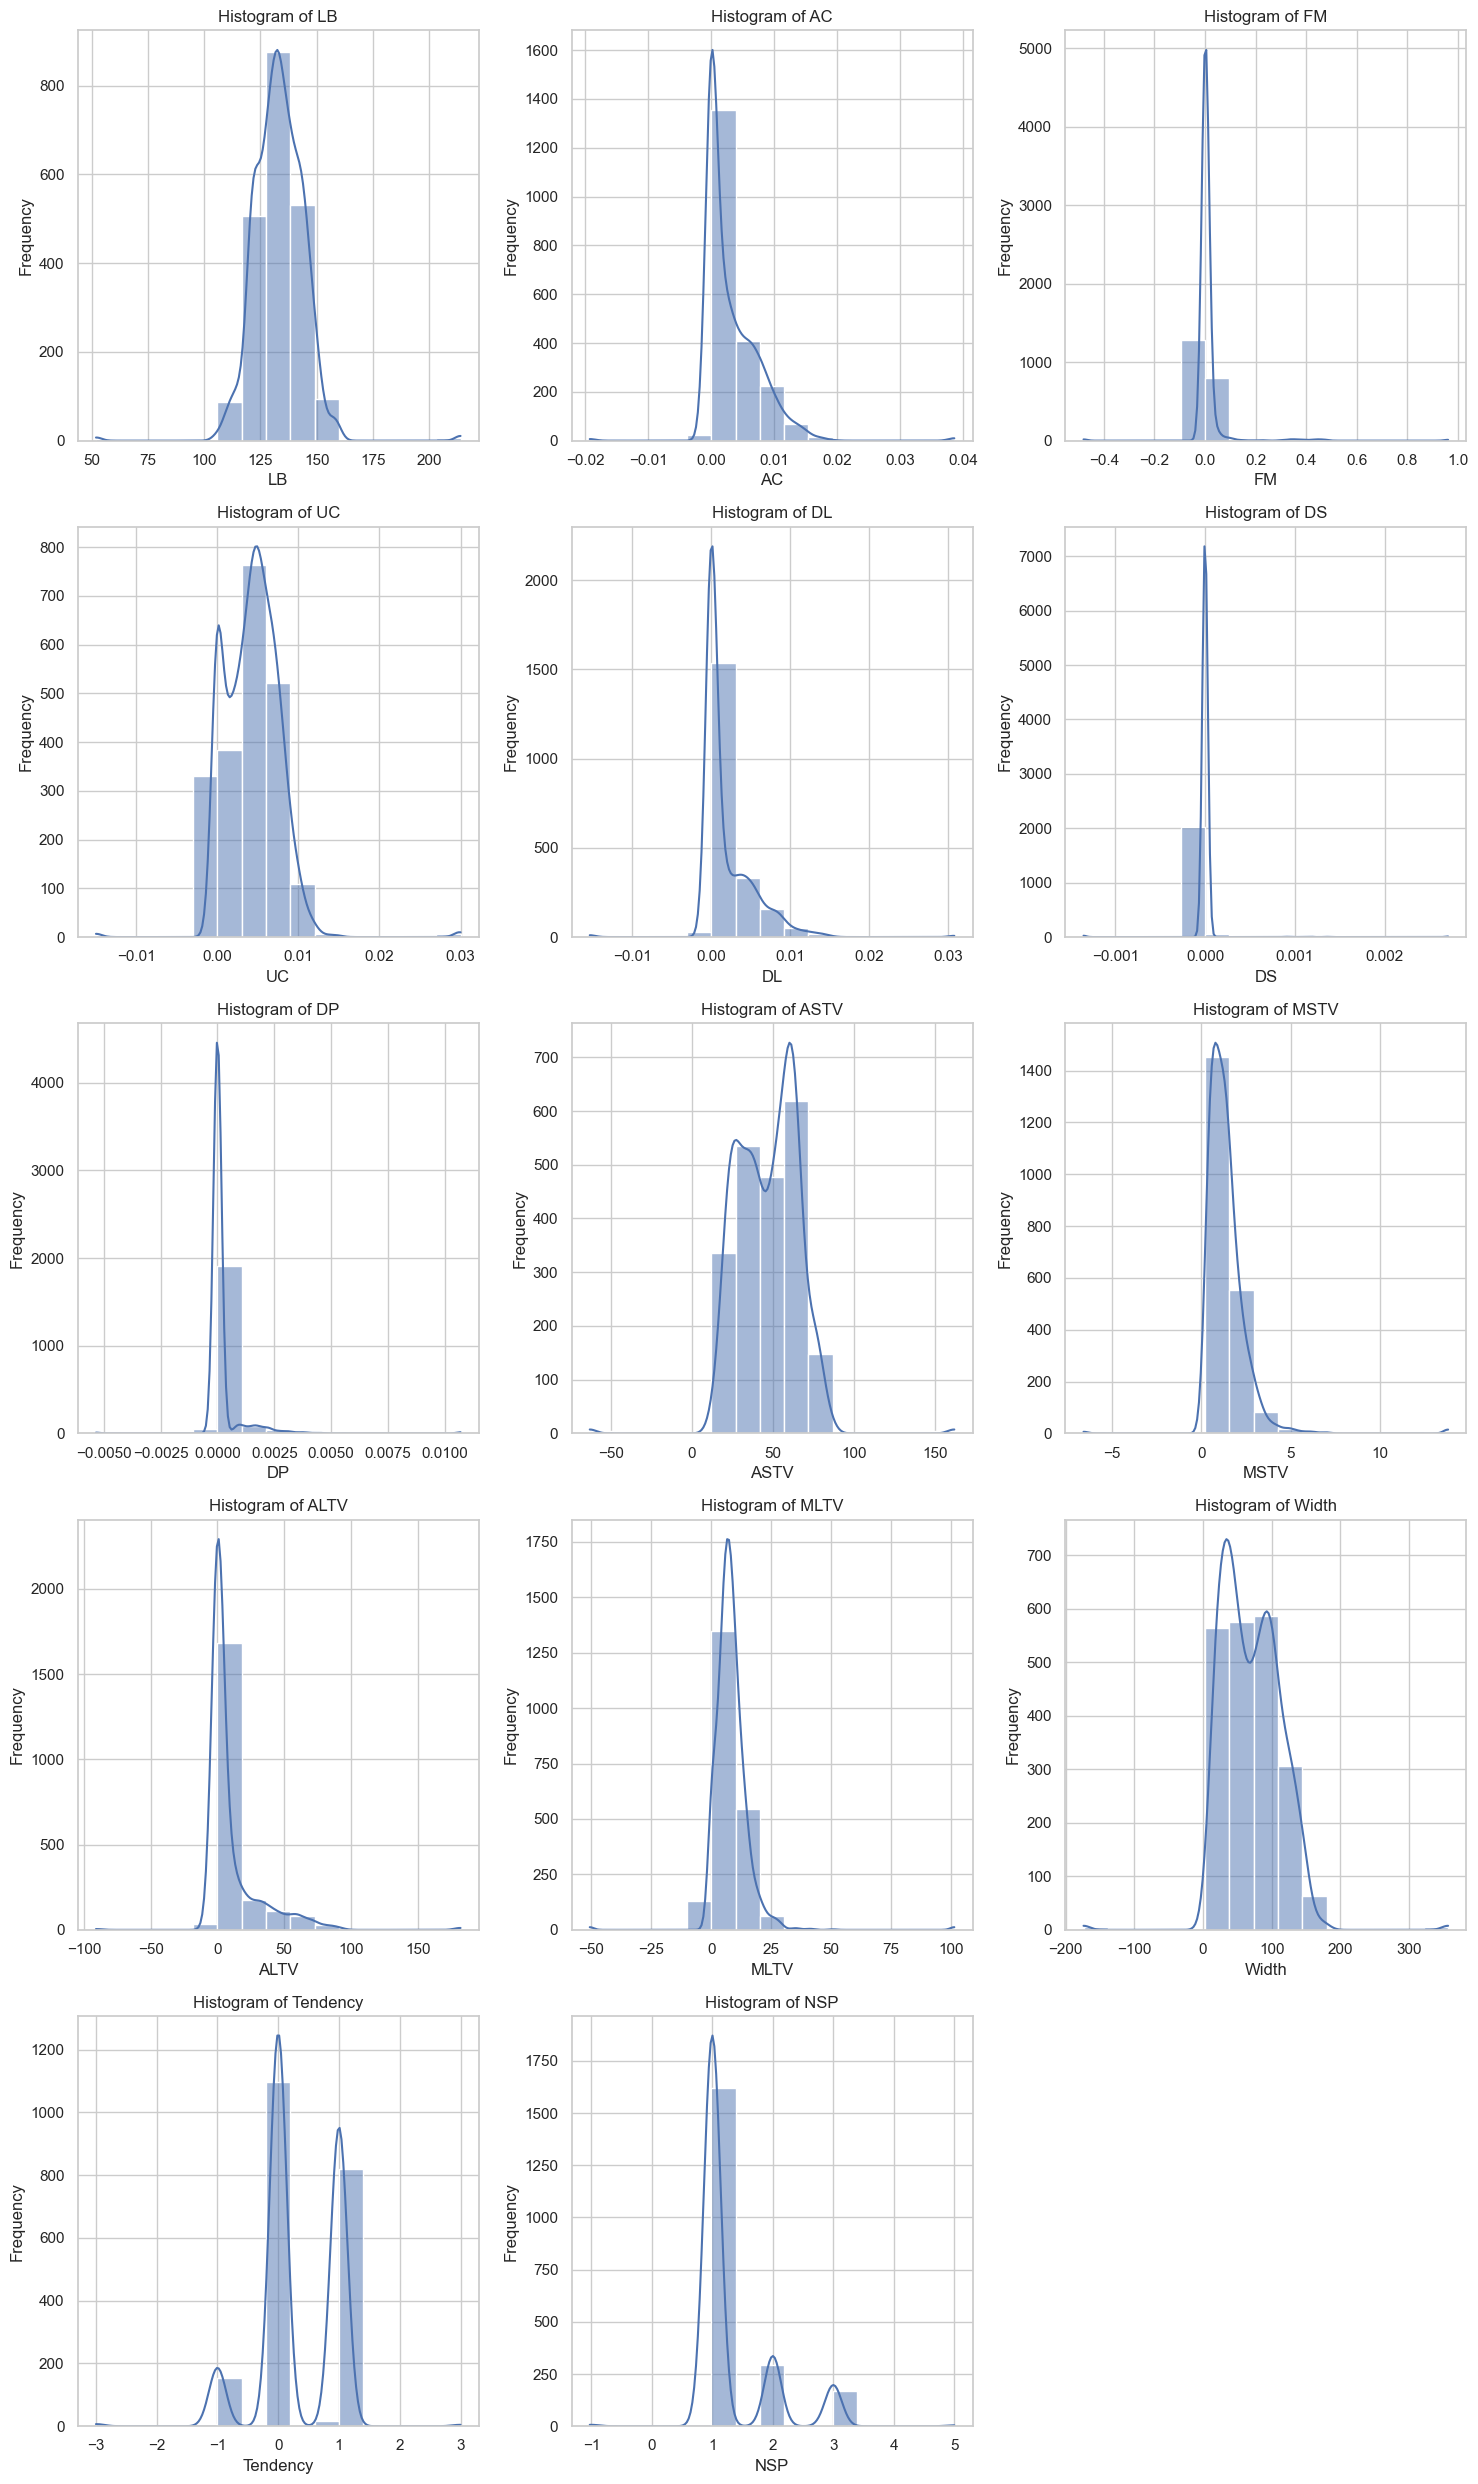

In [25]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Get numerical variables
num_vars = df.select_dtypes(include=['float64', 'int64']).columns
num_vars_count = len(num_vars)


# Determine layout size
cols = 3
rows = (num_vars_count // cols) + (num_vars_count % cols > 0)

# Create histograms for each numerical variable
plt.figure(figsize=(15, 5 * rows))
for i, var in enumerate(num_vars):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[var], bins=15, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




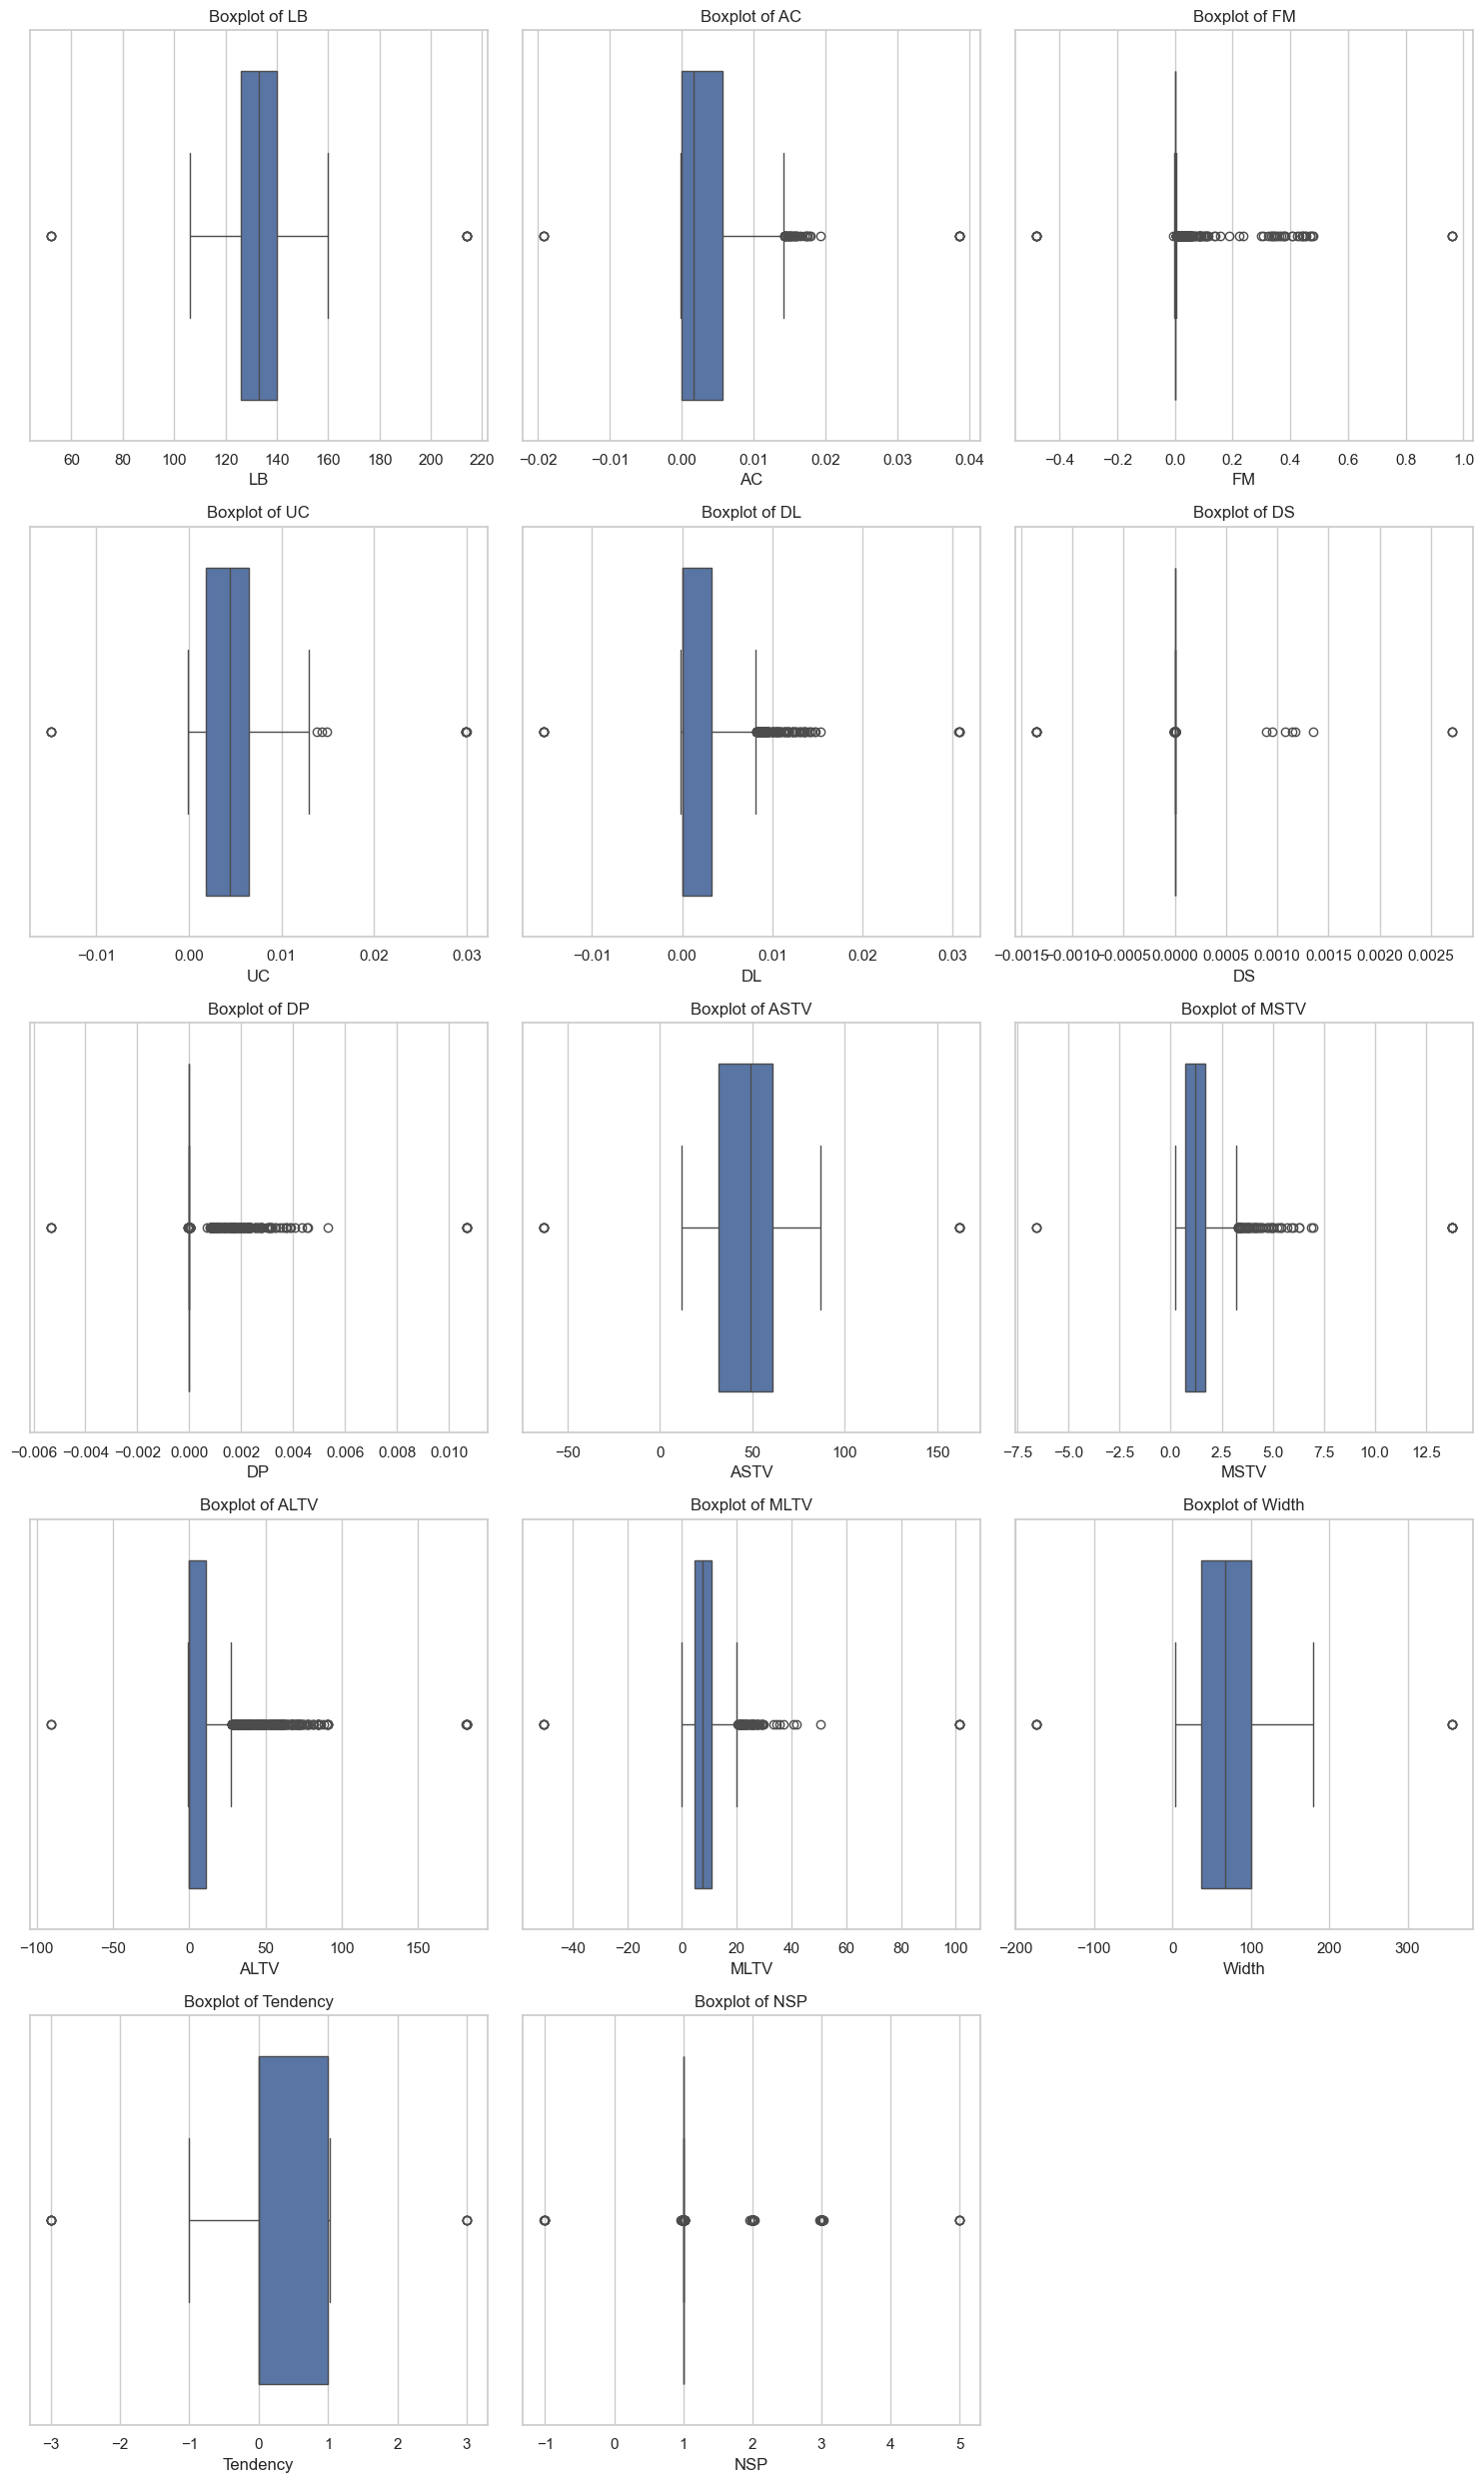

In [27]:
# Create boxplots for each numerical variable
plt.figure(figsize=(15, 5 * rows))
for i, var in enumerate(num_vars):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

In [35]:
# Bar charts for each categorical variable

# Identify categorical variables
cat_vars = df.select_dtypes(include=['object', 'category']).columns

# Check if there are any categorical variables
if len(cat_vars) == 0:
    print("No categorical variables found in the dataset.")
else:
 # Bar charts for each categorical variable
    plt.figure(figsize=(15, 5 * len(cat_vars)))
    for i, var in enumerate(cat_vars):
        plt.subplot(len(cat_vars), 1, i + 1)
        sns.countplot(data=df, x=var, order=df[var].value_counts().index)
        plt.title(f'Bar Chart of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



No categorical variables found in the dataset.


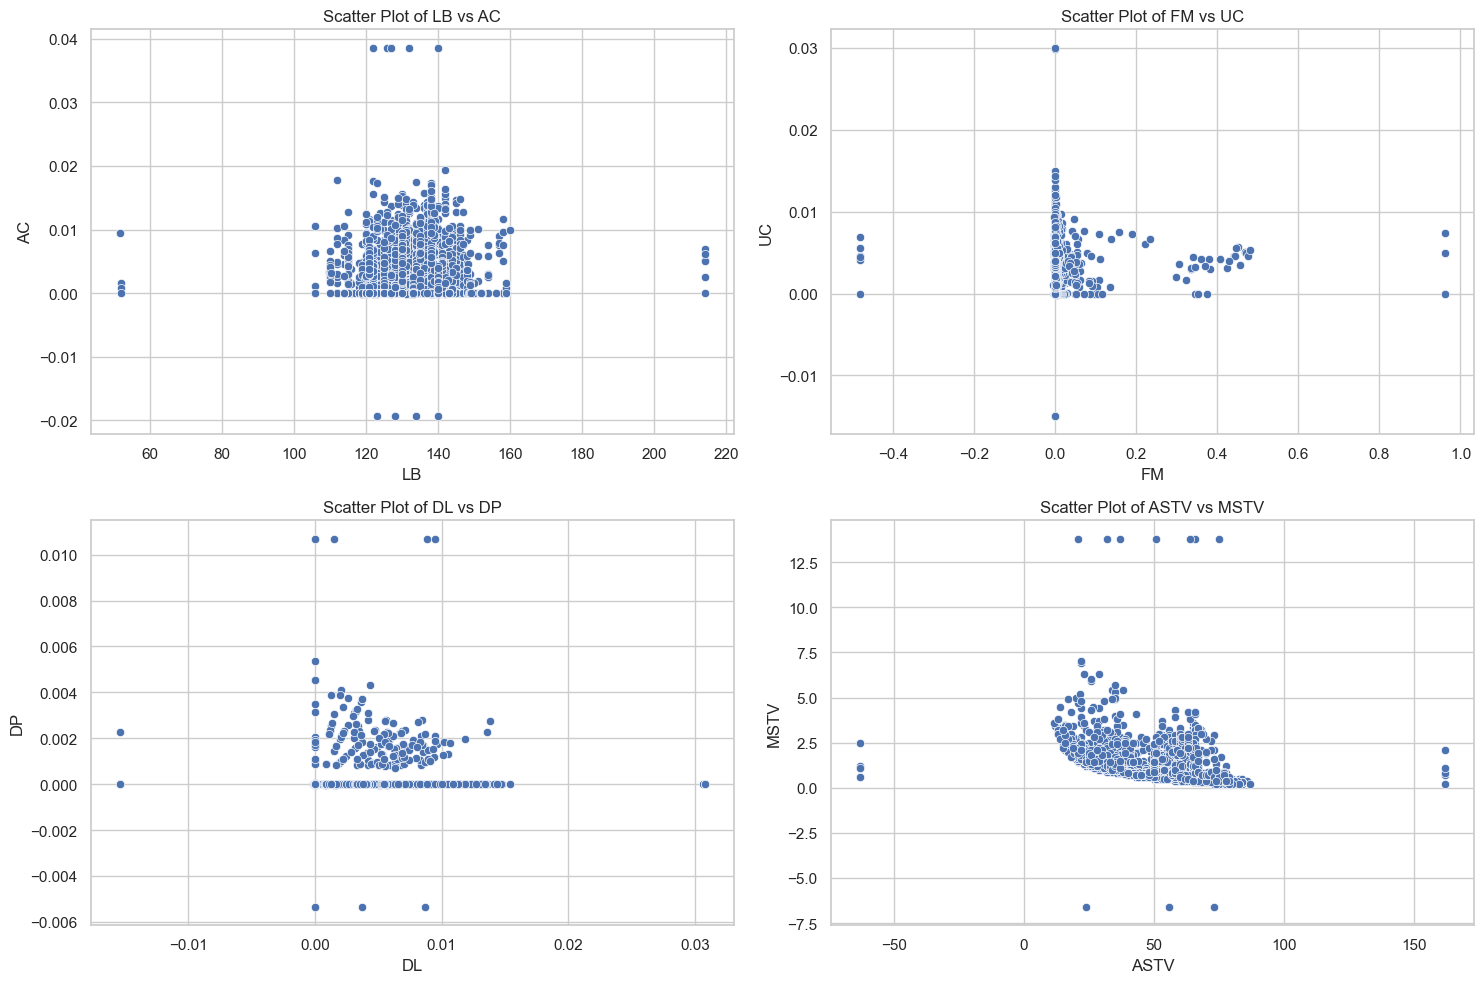

In [45]:
# Scatter plots for selected pairs of numerical variables
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Example pairs: Adjust this based on your variables of interest
scatter_pairs = [
    ('LB', 'AC'),
    ('FM', 'UC'),
    ('DL', 'DP'),
    ('ASTV', 'MSTV'),
]

plt.figure(figsize=(15, 10))
for i, (x_var, y_var) in enumerate(scatter_pairs):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=x_var, y=y_var)
    plt.title(f'Scatter Plot of {x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()



In [ ]:
# Pair Plot
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()
# Violin Plot
# Assuming 'Category' is a categorical variable in your dataset
# Adjust 'Category' to the actual categorical column name in your dataset
if 'Category' in df.columns:  # Check if the categorical column exists
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Category', y='LB', data=df)  # Replace 'LB' with the variable of interest
    plt.title('Violin Plot of LB by Category')
    plt.xlabel('Category')
    plt.ylabel('LB')
    plt.show()
else:
    print("Categorical variable 'Category' not found in the dataset.")


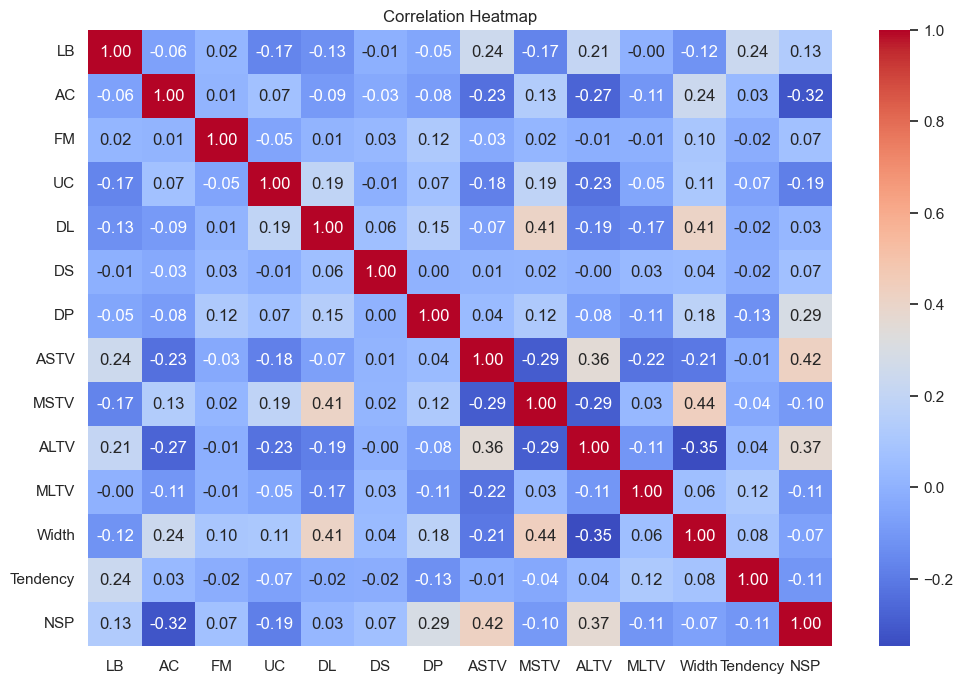

In [41]:
# Calculate the correlation matrix
#Use the correlation matrix to analyze relationships between numerical variables.
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Clinical Monitoring: The insights from this analysis can enhance clinical protocols for monitoring fetal health. 
#Understanding the relationship between fetal movements, heart rate accelerations, and decelerations could lead to 
#more proactive interventions during labor and delivery.

#Risk Assessment: Identifying patterns in decelerations and their timing may help healthcare providers better assess fetal 
#distress and determine when to intervene, potentially improving outcomes.

#Guidance for Further Research: These findings open avenues for further analysis, such as exploring correlations with maternal 
#factors (e.g., stress levels, medical history) or environmental conditions. More comprehensive datasets could lead to more robust insights.

#Enhanced Data Collection: Recognizing the importance of certain variables (like decelerations and heart rate variability) could encourage 
#more targeted data collection in clinical settings, ensuring that vital information is captured for future analyses.


#The exploratory analysis of the cardiotocographic dataset has provided valuable insights into fetal health indicators. 
#By understanding these patterns, healthcare providers can make informed decisions that enhance fetal monitoring and care, 
